**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.


In [ ]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
#for local
#import sys ; sys.path.append('../commons/utils/'); sys.path.append('../commons/utils/data')
!wget https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py -O general.py
from general import configure_lab1_p2
configure_lab1_p2()
from lab1 import *
GRADER, x, y = part_2()
y = y.reshape(np.size(y), 1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--2021-03-19 11:37:12--  https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14615 (14K) [text/plain]
Saving to: ‘general.py’

general.py          100%[===================>]  14.27K  --.-KB/s    in 0s      

2021-03-19 11:37:12 (94.9 MB/s) - ‘general.py’ saved [14615/14615]

lab configuration started
installing libraries
downloading files
lab configured
cargando librerias y variables al ambiente


# Laboratorio 1 - Parte 2. Regresión logística



### Ejercicio 1: Contextualización del problema

En esta sesión de laboratorio, vamos a resolver un problema de clasificación. Los variables que vamos a usar ya se encuentran cargadas:



In [ ]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos, muestra \n",x[range(10), :] )
print("")
print(" muestra de etiquetas a predecir \n", y[range(10)])

conjunto de datos, muestra 
 [[ 3.92606402 -6.83699086]
 [ 7.43382787 -3.7485991 ]
 [ 6.20553473  4.77182668]
 [ 6.77983287 -3.07765299]
 [-5.92614125 -4.87588843]
 [ 7.49283136  3.9516693 ]
 [-1.65572633  6.86081477]
 [-8.14881988 -1.85421149]
 [ 8.12616581 -1.66701921]
 [ 9.73411311 -1.63724335]]

 muestra de etiquetas a predecir 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
#Ejercicio de Codigo
def clases_muestras_carac(X, Y):
    """Esta funcion es encargada retornar el numero clases, muestras 
        y caracteristicas del conjunto de datos X y Y

        X: matriz numpy con el conjunto de datos para entrenamiento
        Y: matriz numpy con el conjunto de etiquetas
        retorna:
            numero de clases (int/float)
            numero de muestras (int/float)
            numero de caracteristicas (int/float)
    """
    ##Pista: es de utilidad el metodo np.unique ?
    N,nf = X.shape
    clases = len(np.unique(Y))
    
    return (N,nf,clases)

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio1", clases_muestras_carac)

TEST EXITOSO!


En los problemas de clasificación, que lo permiten, es de utilidad visualizar los datos. De esta manera uno puede determinar que modelos o algortimos pueden tener mejor rendimiento. En la siguiente función, debera, graficar los datos usando la función [scatter](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) de matplotlib.

In [17]:
#Ejercicio de Codigo
def scatter_plot(X, Y):
    """Esta funcion es encargada de graficar usando un scatter plot
       un problema de clasificacion.

        X: matriz numpy con el conjunto de datos para entrenamiento.
           esta debera ser usada para los ejes del grafico. puede asumir
           que solo va tener dos columnas
        Y: matriz numpy con el conjunto de etiquetas. Debera se usada
           para mostrar en diferentes colores, las etiquetas de cada una
           de las muestras
        retorna:
            No retorna nada, el grafico debe aparecer
    """
    ## puedes acceder con plt a la funcion adecuacada
    ## Pista: recuerda como indexar matrices
    #x_1= X[:, 0]
    #y_1= X[:, 1] 
    #color = Y
    plt.scatter(X[:, 0],X[:, 1] , c= Y)
    # para mostrar el grafico
    figure = plt.gcf()
    plt.show()
   
    return (figure)

In [18]:
## la funcion que prueba tu implementacion
# ignora los graficos que se muestran 
GRADER.run_test("ejercicio2", scatter_plot)

TEST EXITOSO!


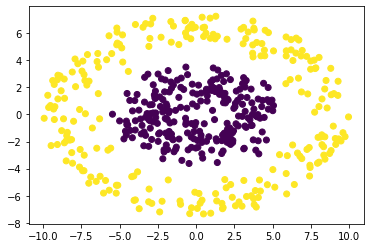

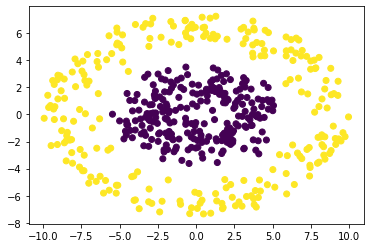

In [19]:
# usarla para ver el grafico
scatter_plot(x,y)

In [20]:
#@title Pregunta Abierta
#@markdown  ¿El problema es linealmente separable? justifique su respuesta 
respuesta_1 = "\"Segun la grafica definida anteriormente, el problema no es linealmente separable, ya que los dos conjuntos de datos no se pueden separar mediante una linea recta.\"" #@param {type:"string"}

### Ejercicio 2: entrenamiento

En este laboratorio se va a realizar un procedimiento análogo al laboratorio anterior, pero con el modelo de *regresión logística* que sirve para resolver problemas de clasificación (en principio biclase).

¿Cómo se relacionan los siguientes conceptos a la luz del modelo de regresión logística? 

1. Función de activación 
2. Extensión de matriz
2. Modelo de regresión logística
3. Potencia del polinomio 
4. El cálculo del error en clasificación 
5. El gradiente descendente

Vamos a completar la función del sigmoide:

In [21]:
#Ejercicio de Código
def sigmoidal(z):
    """Función de activación Sigmoidal

    z: es la varible a la que se le va aplicar el sigmoide.
       es un array numpy de uan sola dimension
    retorna: el valor del sigmiode

    """
    #Complete la siguiente línea con el código para calcular la salida de la función sigmoidal
    # ¿Que metodo de np...{} es de utilidad?
    s = 1/(1+ np.exp(-z))
    
    return s

In [22]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio3", sigmoidal)

TEST EXITOSO!


El la siguiente celda se sugiere la implementación de 3 métodos que nos ayudaran a implementar los otros conceptos. 

1. Modelo de regresión logística(Esta función usa nuestra `sigmoidal`)
2. Extensión de matriz
2. Potencia del polinomio 
4. Cálculo del error en clasificación

Debemos comprender que hacen estas funciones para determinar donde poder usarlas mas adelante. Luego de ellos, ejecuta la celda para cargarlas.

In [23]:
def logistic_regression(X, W):
    """calcula la regresión logistica
    X: los valores que corresponden a las caractersiticas
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado por la regresion
    """
    #Con np.dot se realiza el producto matricial. Aquí X (extendida) tiene dim [Nxd] y W es dim [dx1]
    Yest = np.dot(X,W)
    Y_lest = sigmoidal(Yest)
   
    return Y_lest    #Y estimado: Esta variable contiene ya tiene la salida de sigm(f(X,W))

def extension_matriz(X):
    """funcion que realiza la extension de la matriz X
    X: los valores que corresponden a las caractersiticas sin extender
    retorna: X_ext: matriz con unos extendidos
    """
    #Obtenemos las dimensiones antes de exteneder la matriz
    muestras,caracterisitcas =X.shape
    #Extendemos la matriz X
    unos = np.array([np.ones(muestras)])
    X_ext = np.concatenate((unos.T, X), axis=1)
    X_ext = X_ext.reshape(muestras, caracterisitcas+1)
    return (X_ext)


def potenciaPolinomio(X,grado):
    """calcula la potencia del polinomio
    X: los valores que corresponden a las caractersiticas
    grado: esl grado para realizar la potencia al polinomio
    retorna: el valor de X despues elevarlo al grado del polinimoo indicado
    """
    X2 = X.copy()
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2

def cost_logistic(Y_lest, Y):
    """calculo del error logistico
       Si es diferente el Y_estimado con el Y_real cuenta como un error
       Y_lest: numpy array con los valores reales estimados
       Y:  numpy array  valor con los valores reales de las etiquetas
       retorna: costo logistico  -- numpy array
    """
    f1 = Y*np.log(Y_lest)
    f2 = (1-Y)*np.log(1-Y_lest)
    error = -np.sum(f1+f2)/Y.shape[0]
    return error

recordando lo aprendido anteriormente, dividimos nuestro cojunto de datos y normalizamos.
**SOLO EJECUTAR UNA VEZ**

In [24]:
#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
N = x.shape[0]
ind=np.random.permutation(N)
Xtrain = x[ind[0:int(math.ceil(0.7*N))],:]
Xtest = x[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = y[ind[0:int(math.ceil(0.7*N))]]
Ytest = y[ind[int(math.ceil(0.7*N)):N]]
# normalizamos
Xtrain, Xtest = normalizar(Xtrain, Xtest)

Ahora vamos a completar el código de la regla de actualización de los parámetros del algoritmo de **gradiente_descedente** 


$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

recordar que aca queremos reducir el costo logistico, pero la actualización de los pesos sigue siendo equivalente a la regresión vista anteriormente, solo que agregando la función $g$ que corresponde al sigmoide.

$$ \frac{\partial E(w)}{\partial w_j} = \frac{\partial J({\bf{w}})}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N}\left( g(f({\bf{x}}_i,{\bf{w}})) - t_i\right)x_{ij}$$

Debemos tener presente:
- Usar las funciones ya implementadas y no usar **ninguna otra libreria** adicional a las librerias ya pre-cargadas como numpy.
- Dentro de nuestra función **vamos incluir una transformación polinómica**, por lo tanto el proceso a implementar puede ser descrito en los siguientes pasos:
    - Aplicar la transformación polinómica
    - Extender la matriz
    - Inicializar $w$
    - Y por cada iteración realizar el cálculo para actualizar $w$

In [25]:
#ejercicio de codigo
def gradiente_descendente_logistic_poly(X,Y,grado,eta, iteraciones):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje
    grado: grado para usar en la transformacion polinomica
    iteraciones: numero de iteraciones maxima

    retorna: W el valor de de los parametros de regresión polinomica
    """
    # aplicamos la transformación
    X2 = potenciaPolinomio(X,grado)
    
    # realizamos la extensión
    X2_ext = extension_matriz(X2)
    
    #Tomamos el número de variables del problema leugo de la transformacion
    d = X2_ext.shape[1]
    #Tomamos el número de muestras de la base de datos
    N = X2_ext.shape[0]
    #Inicializamos w
    W = np.zeros(d)
    W = W.reshape(np.size(W),1)
    costos = np.zeros(iteraciones)
      
    for iter in range(iteraciones):
       
        #Aquí debe completar el código con la regla de actualización de los parámetros W para regresión
        #logística. Tenga en cuenta los nombres de las variables ya creadas: W, X, Y
        
        Ylest= logistic_regression(X2_ext, W)
        temp = np.dot(X2_ext.T,Ylest - Y)
        costo = cost_logistic(Ylest, Y)
        W =  W - (eta*temp)/N
        #adicionamos el costo por cada iteracion
        costos[iter] = costo


    print("costo despues de finalizar las iteraciones", costo)
    return W, costos

In [26]:
## la funcion que prueba tu implementacion
# ignorar los print que se ejecutan
GRADER.run_test("ejercicio4", gradiente_descendente_logistic_poly)

costo despues de finalizar las iteraciones 0.03629996809207923
costo despues de finalizar las iteraciones 0.10817489803363714
TEST EXITOSO!


Veamos de manera preliminar, si nuestro gradiente se esta acercando al un costo óptimo. 
Vamos entrenar con 100 iteraciones y vemos el costo logistico como cambia de acuerdo a las iteraciones.
¿Que pasa si cambias el grado?

costo despues de finalizar las iteraciones 0.8826349117547916
este las dimensiones de w son: (3, 1)


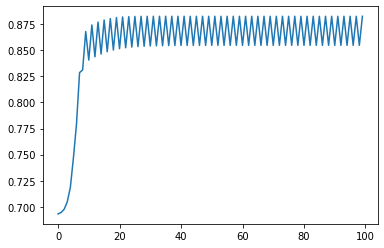

In [27]:
iteraciones = 100
w, costos_logistico = gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado = 1, eta = 10, iteraciones = iteraciones)
print("este las dimensiones de w son:", w.shape)
plt.plot(range(iteraciones), costos_logistico)

Como habiamos visto antes, el costo es nuestra medida de optimización, pero al final debemos evaluar que tambien esta realizando la tarea de clasificar. Entiende la siguiente función. Prestemos especial atención al bloque `if-else`. 

In [28]:
def evaluar_modelo (W, X_to_test, Y_True, grado):
    """ funcion que evalua un modelo de clasificación

W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo
    grado: valor del polinomio a usar

    retorna: el error de clasificación.
    """
    X2 = potenciaPolinomio(X_to_test,grado)
    # realizamos la extensión
    X2_ext = extension_matriz(X2)
    Y_EST = logistic_regression(X2_ext,W)
    #Se asignan los valores a 1 o 0 según el modelo de regresión logística definido
    for pos, tag in enumerate (Y_EST):
        
        if tag >= 0.5:
            Y_EST[pos] = 1
        else:
            Y_EST[pos] = 0
            
    error = 0
    
    for ye, y in zip(Y_EST, Y_True):
        if ye != y:
            error += 1
    error_clasificacion =  error/np.size(Y_True)
    return(error_clasificacion)


Probemos la función al evaluar el w obtenido. Tener presente que para la evaluación usamos el X y Y adecuado. Recuerda usar el grado de acuerdo a la ultima ejecución.

In [29]:
# recuerda que si entrenaste con grado = 2 debes asignar el mismo valor.
error_test = evaluar_modelo(w, Xtest, Ytest, grado = 1)
print("error en el conjunto de pruebas", error_test)

error en el conjunto de pruebas 0.49333333333333335


### Ejercicio 3: Experimentar

En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y grados de polinimios. Vamos a dejar por ahora un numero de iteraciones fijas = 500. Para ello completa la siguiente función. Recuerda usar las funciones anteriores.

In [30]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 500

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:
            # ignorar el costo
            W, costo = gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado,eta, numero_iter)
            error_entrenamiento = evaluar_modelo(W, Xtrain, Ytrain, grado)
            error_prueba = evaluar_modelo(W, Xtest, Ytest, grado)
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'error_entreamiento'] = error_entrenamiento
            resultados.loc[idx,'error_prueba'] = error_prueba
            idx = idx+1

    return (resultados)

In [31]:
## la funcion que prueba tu implementacion
# ignorar los prints de "costo despues de finalizar"!
GRADER.run_test("ejercicio5", experimentar)

costo despues de finalizar las iteraciones 0.6712592433108224
costo despues de finalizar las iteraciones nan
costo despues de finalizar las iteraciones nan
costo despues de finalizar las iteraciones 0.6712592436542041
costo despues de finalizar las iteraciones 0.11043293517597812
costo despues de finalizar las iteraciones 0.10769578115322631
TEST EXITOSO!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


In [32]:
tasas = [10.0, 1.0, 0.1, 0.001]
grados = [1,2,3,4]
resultados = experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados)

costo despues de finalizar las iteraciones 0.8826348997727398
costo despues de finalizar las iteraciones 0.004434104238589612
costo despues de finalizar las iteraciones 0.004358168284759835
costo despues de finalizar las iteraciones nan
costo despues de finalizar las iteraciones 0.6920677171704778
costo despues de finalizar las iteraciones 0.020130013654843956


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


costo despues de finalizar las iteraciones 0.019995364120531392
costo despues de finalizar las iteraciones nan
costo despues de finalizar las iteraciones 0.6920677171704889
costo despues de finalizar las iteraciones 0.0957996048041662
costo despues de finalizar las iteraciones 0.09579283016074297
costo despues de finalizar las iteraciones 0.05683514416055423
costo despues de finalizar las iteraciones 0.6929066265184273
costo despues de finalizar las iteraciones 0.6003185360384014
costo despues de finalizar las iteraciones 0.6002628080566793
costo despues de finalizar las iteraciones 0.4329779459867609


In [33]:
# para ver los resultados
resultados

,grado,tasa de aprendizaje,error_entreamiento,error_prueba
0,1.0,10.000,0.502857,0.493333
1,2.0,10.000,0.000000,0.000000
2,3.0,10.000,0.000000,0.000000
3,4.0,10.000,0.000000,0.000000
4,1.0,1.000,0.468571,0.526667
5,2.0,1.000,0.000000,0.000000
6,3.0,1.000,0.000000,0.000000
7,4.0,1.000,0.002857,0.000000
8,1.0,0.100,0.468571,0.526667
9,2.0,0.100,0.000000,0.000000


In [34]:
#@title Pregunta Abierta
#@markdown  ¿con base a los resultados anteriores, qué efecto tiene el grado en los errores de entrenamiento y de prueba? justifique
respuesta_2 = "\"Los resultados anteriores contienen un factor comun respecto al grado, los errores de entrenamiento y de prueba, mientras mayor sea el grado del polinomio, menor son los errores de entrenamiento y de prueba. Esto se debe a la implementacion de grados ideales para el modelo de regresion logistica. El uso de grados mayores de 3 o 4 en la funcion, podria causar un sobreajuste por el exceso de flexibilidad\"" #@param {type:"string"}

In [36]:
#@title Pregunta Abierta
#@markdown  ¿es normal que los errores de entrenamiento y prueba sean diferentes? justifique
respuesta_3 = "\"El error de prueba se mide mediante el conjunto de datos nuevos para el modelo, mientras que el error de entrenamiento se mide respecto al conjunto utilizado para el entrenamiento del modelo. Segun esto, el error de prueba y el de entrenamiento deben ser diferentes para mantener la efectividad del modelo. \"" #@param {type:"string"}

Vamos entrenar nuevamente pero solo con los mejores parámetros. Si hay parametros empatados, el modelo que tenga menos parámetros deberia ser el mejor (recuerda que cuando aumentamos el grado del polinomio aumentamos el número de parametros del modelo).

In [37]:
# puedes usar el siguiente código para ordenar los resultados y ver los 3 primeros
# resultados, usa esta salida, para ver cuales fueron los mejores parámetros
resultados.sort_values(by = ['error_prueba', 'grado'], ascending = True).head(3)

,grado,tasa de aprendizaje,error_entreamiento,error_prueba
1,2.0,10.0,0.0,0.0
5,2.0,1.0,0.0,0.0
9,2.0,0.1,0.0,0.0


In [38]:
#@title Pregunta Abierta
#@markdown ¿por qué se uso el error de prueba para ordenar la tabla de resultados en lugar del error de entrenamiento?
respuesta_4 = "Se usa el error de prueba,  ya que como se basa en las pruebas que se hacen durante la ejecuci\xF3n con datos nuevos nos interesa m\xE1s ver los errores que se generan cuando se prueba el modelo con datos nuevos y no con los datos t\xEDpicos que se usaron cuando se entren\xF3 el mismo." #@param {type:"string"}

Entrenemos con los mejores parámetros

In [39]:
# ignoramos el costo!
W,_= gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado = 2,eta = 10, iteraciones = 500)
print("estos son los pesos para el modelo entrenando \n", W)

costo despues de finalizar las iteraciones 0.004434104238589612
estos son los pesos para el modelo entrenando 
 [[-12.4800486 ]
 [  0.09893807]
 [  0.61022132]
 [  7.43316778]
 [  8.12622508]]


Debemos recordar que el modelo creado se puede resumir en una ecuación usando los pesos de $w$:

![vectorization](https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/images/frontera_logistic.jpg)


En el ejemplo la ecuación estaria dada como: 2.0*x1 + 3.0*x2 + 4.0, para el caso del polinomio grado 1.


Usando los valores del ultimo $w$ entrenado podriamos construir la función que define nuestra frontera.


In [43]:
#@title Pregunta Abierta
#@markdown Escribe el modelo completo con sus variables y coeficientes de f(**x**,**w**) con la mejor frontera de decisión que encontró. Recuerda tener presente el grado del polinomio.
respuesta_5 = "0.09x1 + 0.61x1**2 + 7.43x2  +  8.12x2**2 -12.48" #@param {type:"string"}

In [41]:
GRADER.check_tests()

Todo se ve ok. Asegurate de responder las preguntas abiertas y envia e archivo al formulario ¡buen trabajo!


In [42]:
#@title Integrantes
codigo_integrante_1 ='1000415078' #@param {type:"string"}
codigo_integrante_2 = '1035833769'  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo del los profesores


In [ ]:
GRADER.grade()